<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Generating Maps with Python




In [1]:
# Import Primary Modules:

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Let's install Folium

import folium

print('Folium installed and imported!')

Folium installed and imported!


In [3]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Let's create a map centered around Canada and play with the zoom level to see how it affects the rendered map.

In [4]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

Let's create the map again with a higher zoom level


In [5]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

As you can see, the higher the zoom level the more the map is zoomed into the given center.


Lets create a map of Mexico with a zoom level of 4.


In [6]:
map_maxico = folium.Map(location=[23.6345, -102.5528], zoom_start = 4)

map_maxico



Another cool feature of **Folium** is that we can generate different map styles.


### A. Stamen Toner Maps

These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones. 


Let's create a Stamen Toner map of canada with a zoom level of 4.


In [7]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

### B. Stamen Terrain Maps

These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.


Let's create a Stamen Terrain map of Canada with zoom level 4.


In [8]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

Lets create a map of Mexico to visualize its hill shading and natural vegetation. Use a zoom level of 6.


In [9]:
map_maxico = folium.Map(location=[23.6345, -102.5528], zoom_start = 6, tiles = 'Stamen Terrain')

map_maxico


## Maps with Markers <a id="6"></a>


Let's download and import the data on San Francisco police department incidents from 2016 and read it into a _pandas_ dataframe:


In [10]:
df_sf_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Let's take a look at the first five items in our dataset.


In [11]:
df_sf_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Let's find out how many entries there are in our dataset.


In [12]:
df_sf_incidents.shape

(150500, 13)

So the dataframe consists of 150,500 crimes, which took place in the year 2016. In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.


In [13]:
# lets a create a check point: make a copy of the df_sf_incidents dataset

df_incidents = df_sf_incidents.copy()


df_incidents is df_sf_incidents


False

In [14]:
df_incidents.shape

(150500, 13)

In [15]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Let's confirm that our dataframe now consists only of 100 crimes.


In [16]:
df_incidents.shape

(100, 13)

Now that we reduced the data a little bit, let's visualize where these crimes took place in the city of San Francisco. We will use the default style and we will initialize the zoom level to 12. 


In [17]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [18]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a _feature group_ with its own features and style and then add it to the sanfran_map.


In [19]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

We can also add some pop-up text that would get displayed when we hover over a marker. Let's make each marker display the category of the crime when hovered over.


In [20]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)



If we find the map to be so congested will all these markers, there are two remedies to this problem. The simpler solution is to remove these location markers and just add the text to the circle markers themselves as follows:


In [21]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which we can then analyze separately.

To implement this, we start off by instantiating a _MarkerCluster_ object and adding all the data points in the dataframe to this object.


In [22]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Notice how when we zoom out all the way, all markers are grouped into one cluster, _the global cluster_, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once we start zooming in, the _global cluster_ will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.


## Assignment 1:

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)

Data Analysis / Statistics

Data Journalism

Data Visualization

Deep Learning

Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file. Let's create a plot to visualize the percentage of the respondents' interest in the different data science topics surveyed.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Lets download and import survey results

df_survey = pd.read_csv('/content/drive/MyDrive/Topic_Survey_Assignment (2).csv')

df_survey


,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [25]:
# sort the dataframe by a column value

df_survey.sort_values(by=['Very interested'], ascending=False, axis=0, inplace=True)

df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


Lets use the artist layer of Matplotlib to visualize the percentage of the respondents' interest in the different data science topics surveyed.

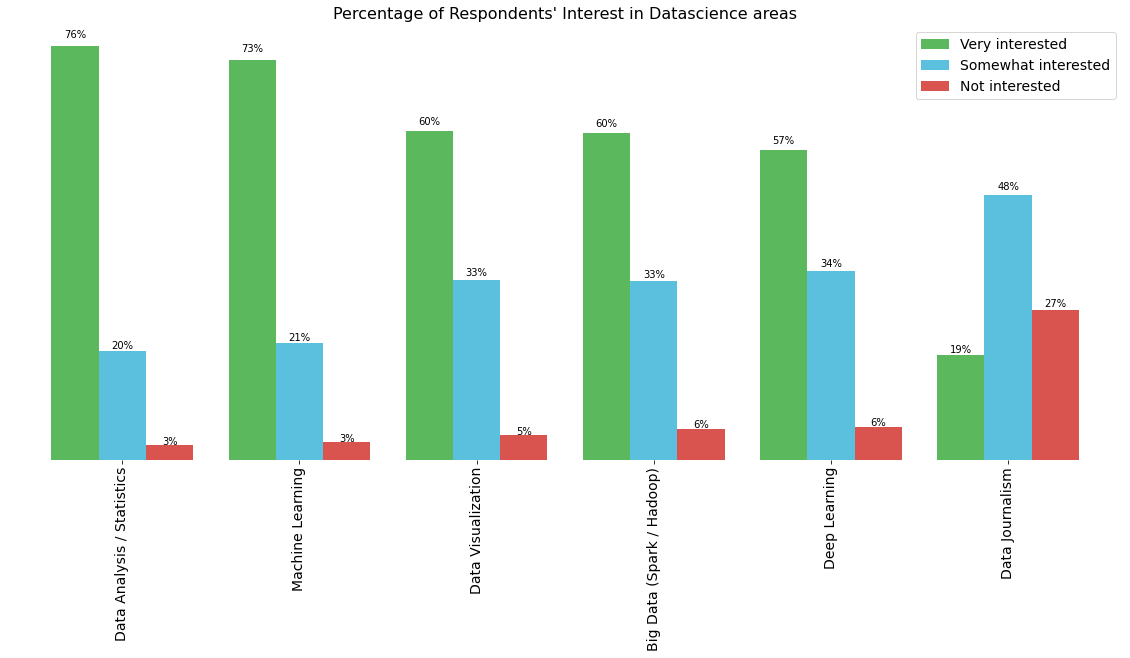

In [26]:
df_survey_percentage = df_survey.div(2233, axis=0)
ax = df_survey_percentage.plot(kind='bar',
                               figsize=(20,8),
                               width=(0.8),
                               color=('#5cb85c', '#5bc0de', '#d9534f'),
                               edgecolor=None,
                               fontsize=14)                                    

ax.set_title("Percentage of Respondents' Interest in Datascience areas", fontsize=16) 
ax.legend(labels=df_survey.columns, fontsize=14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{height:.0%}', (x+width/2 , y+height*1.02), ha='center')



## Assignment 2:

Using 'Choropleth' map, convert the San Francisco dataset to represent the total number of crimes in each neighborhood.

In [27]:
# Make a copy of the San Francisco police department incidents from 2016 dataset

df_sanfran = df_sf_incidents.copy()

df_sanfran.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [28]:
df_sanfran.shape

(150500, 13)

In [29]:
# count the number of crimes in each Neighbourhood

df_sf = df_sanfran['PdDistrict'].value_counts().rename_axis('Neighbourhood').reset_index(name='crime_count')
df_sf.sort_values('Neighbourhood', inplace=True)
df_sf.reset_index(drop=True, inplace=True)

df_sf

,Neighbourhood,crime_count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. 

In [30]:
# download San Francisco geojson file

!wget --quiet https://cocl.us/sanfran_geojson -O san-francisco.geojson

print("GeoJason file downloaded")

GeoJason file downloaded


And now to create a `Choropleth` map, we will use the _choropleth_ method with the following main parameters:

1.  geo_data, which is the GeoJSON file.
2.  data, which is the dataframe containing the data.
3.  columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest.

In [31]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

sf_geo = r'san-francisco.geojson'

sf_geo_map = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Choropleth(
    geo_data = sf_geo,
    data = df_sf,
    columns=['Neighbourhood', 'crime_count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',     
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in San Francisco'    
).add_to(sf_geo_map)

sf_geo_map



As per our `Choropleth` map legend, the darker the color and the closer the color to red, the higher the number of Crimes from that Neighbourhood.